Going to calculate the effectiveness of investing when various EMAs cross over each other. In particular:
- 10 & 30 EMA
- 50 & 200 EMA
- May also calculate SMA's as well

In [66]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#Reading in BTC prices
df = yf.download('BTC-USD')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [68]:
df.shape

(3376, 6)

In [69]:
#Creating columns for various EMA's
df['EMA10'] = df['Close'].ewm(span = 10, adjust = False).mean()
df['EMA30'] = df['Close'].ewm(span = 30, adjust = False).mean()
df['EMA50'] = df['Close'].ewm(span = 50, adjust = False).mean()
df['EMA200'] = df['Close'].ewm(span = 200, adjust = False).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,EMA50,EMA200
Date,,,,,,,,,,
2023-12-10,43728.382812,44034.625000,43593.285156,43779.699219,43779.699219,13000481418,42363.240851,39309.616943,37255.139858,31237.427524
2023-12-11,43792.019531,43808.375000,40234.578125,41243.832031,41243.832031,40632672038,42159.711974,39434.405013,37411.559159,31336.993738
2023-12-12,41238.734375,42048.304688,40667.562500,41450.222656,41450.222656,24779520132,42030.713917,39564.457764,37569.938120,31437.622881
2023-12-13,41468.464844,43429.781250,40676.867188,42890.742188,42890.742188,26797884674,42187.082693,39779.056759,37778.597103,31551.584268
2023-12-14,42884.261719,43368.636719,41968.000000,42992.289062,42992.289062,25614530560,42333.483851,39986.362069,37983.055611,31665.422126


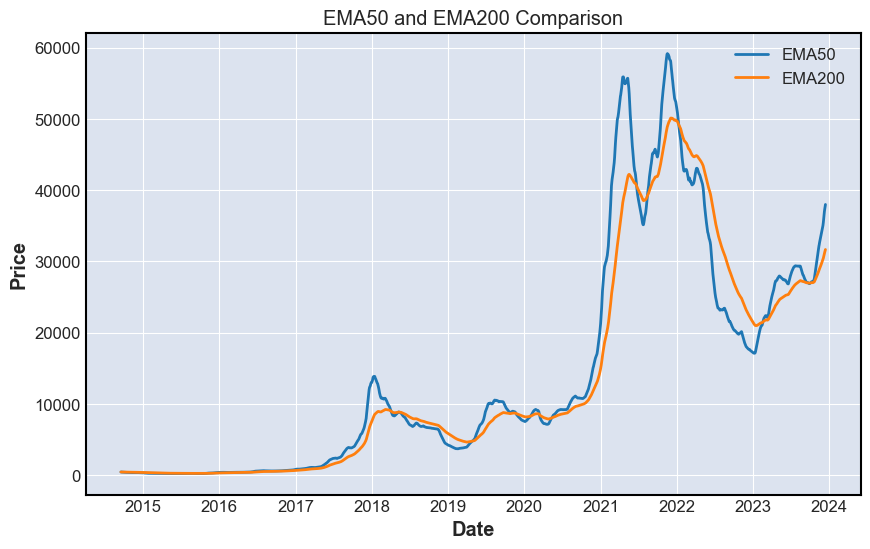

In [70]:
# Plotting EMA10 and EMA30
plt.figure(figsize=(10, 6))
plt.plot(df['EMA50'], label='EMA50')
plt.plot(df['EMA200'], label='EMA200')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA50 and EMA200 Comparison')
plt.legend()

# Show the plot
plt.show()

In [71]:
df = df[df.index > '2016-01-01']
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,EMA50,EMA200
Date,,,,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,433.128143,422.012331,401.465997,322.877071
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,432.561387,422.528373,402.585409,323.943080
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,432.657681,423.209833,403.781706,325.029129
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,432.530828,423.774360,404.886737,326.093118
2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500,431.907952,424.118273,405.836473,327.118112


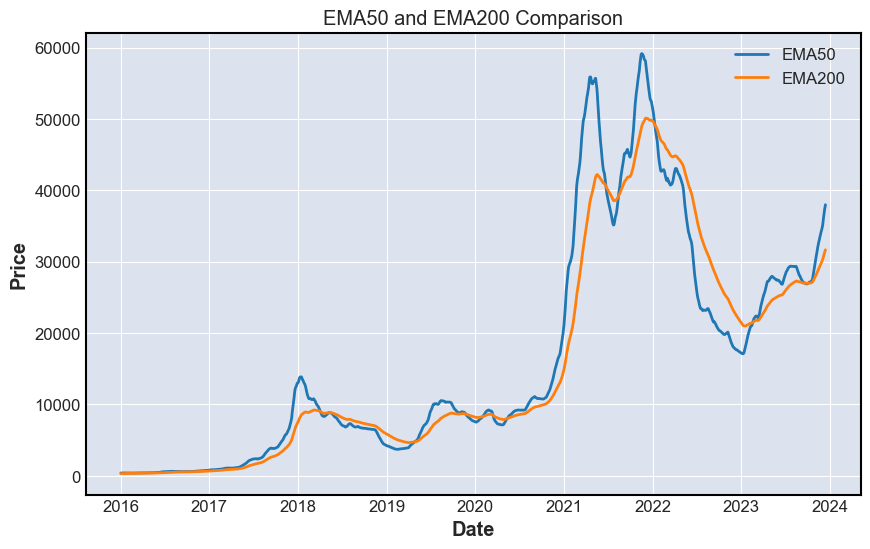

In [72]:
# Plotting EMA10 and EMA30
plt.figure(figsize=(10, 6))
plt.plot(df['EMA50'], label='EMA50')
plt.plot(df['EMA200'], label='EMA200')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA50 and EMA200 Comparison')
plt.legend()

# Show the plot
plt.show()

In [73]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA30,EMA50,EMA200
Date,,,,,,,,,,
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,433.128143,422.012331,401.465997,322.877071
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,432.561387,422.528373,402.585409,323.943080
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,432.657681,423.209833,403.781706,325.029129
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,432.530828,423.774360,404.886737,326.093118
2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500,431.907952,424.118273,405.836473,327.118112


In [74]:
dforiginal = df

#New dataframe with just the closing prices
df = df[['Close']]
df.rename(columns = {'Close':'Price'}, inplace = True)

#Calculating log returns
df['Log Returns'] = np.log(df['Price'].div(df['Price'].shift()))

df.dropna(inplace=True)
df.head()

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3909553736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Close':'Price'}, inplace = True)
/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3909553736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Returns'] = np.log(df['Price'].div(df['Price'].shift()))
/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3909553736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

,Price,Log Returns
Date,,
2016-01-03,430.010986,-0.007938
2016-01-04,433.091003,0.007137
2016-01-05,431.959991,-0.002615
2016-01-06,429.105011,-0.006631
2016-01-07,458.048004,0.065272


In [75]:
#Column to see cumulative returns if you held throughout the time
df['Cumulative Returns'] = df['Log Returns'].cumsum().apply(np.exp)
df.tail()

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/1700653006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Returns'] = df['Log Returns'].cumsum().apply(np.exp)


,Price,Log Returns,Cumulative Returns
Date,,,
2023-12-10,43779.699219,0.001228,101.005681
2023-12-11,41243.832031,-0.059669,95.155093
2023-12-12,41450.222656,0.004992,95.631264
2023-12-13,42890.742188,0.034163,98.954737
2023-12-14,42992.289062,0.002365,99.189019


In [76]:
#Creating EMA50 and EMA200 columns
df['EMA50'] = df['Price'].ewm(50, min_periods = 50).mean()
df['EMA200'] = df['Price'].ewm(200, min_periods = 200).mean()

df.dropna(inplace = True)
df

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3643159730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA50'] = df['Price'].ewm(50, min_periods = 50).mean()
/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3643159730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA200'] = df['Price'].ewm(200, min_periods = 200).mean()
/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3643159730.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

,Price,Log Returns,Cumulative Returns,EMA50,EMA200
Date,,,,,
2016-07-20,665.684998,-0.010727,1.535825,580.710893,508.364433
2016-07-21,665.012024,-0.001011,1.534273,582.395321,509.595547
2016-07-22,650.619019,-0.021881,1.501066,583.757996,510.700681
2016-07-23,655.556030,0.007560,1.512456,585.191538,511.832605
2016-07-24,661.284973,0.008701,1.525674,586.710300,512.997145
...,...,...,...,...,...
2023-12-10,43779.699219,0.001228,101.005681,34087.217632,29336.885772
2023-12-11,41243.832031,-0.059669,95.155093,34227.543405,29396.124341
2023-12-12,41450.222656,0.004992,95.631264,34369.164567,29456.095011


Text(0.5, 0, 'Date')

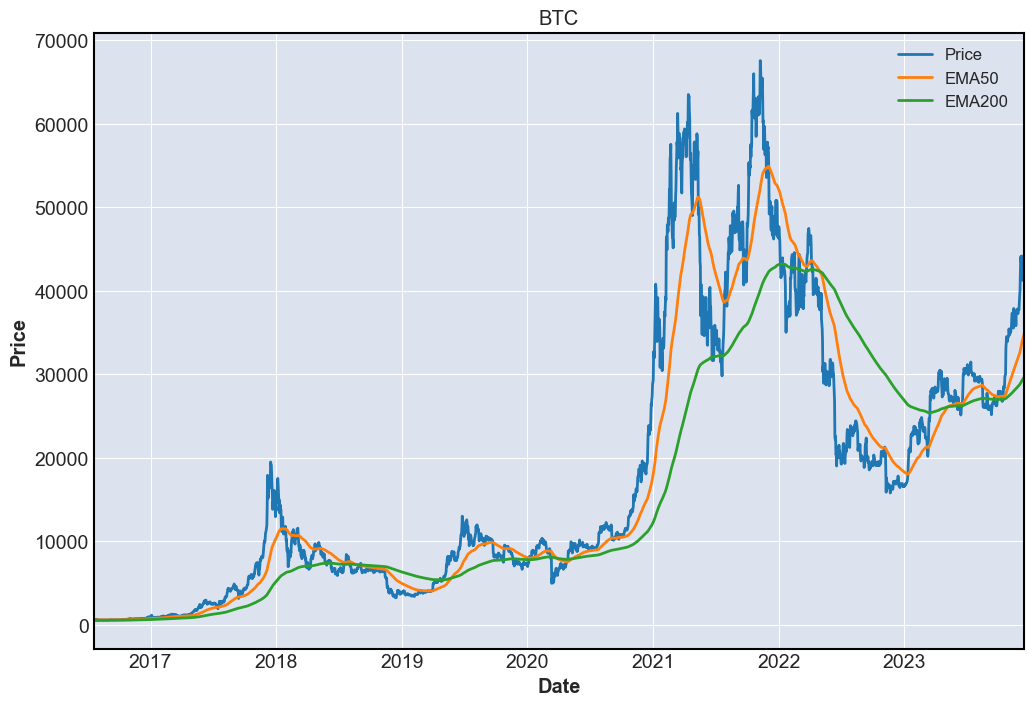

In [77]:
# Plot with price and EMA's
df[["Price", "EMA50", "EMA200"]].loc["2016":"2024"].plot(title="BTC",figsize=(12, 8), fontsize=14)

# Adding legend
plt.legend
plt.ylabel("Price")
plt.xlabel("Date")

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/2820227523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positions'] = np.where(df['EMA50'] > df['EMA200'], 1, -1)


<Axes: title={'center': 'BTC w/EMA50, EMA200 & Positions'}, xlabel='Date'>

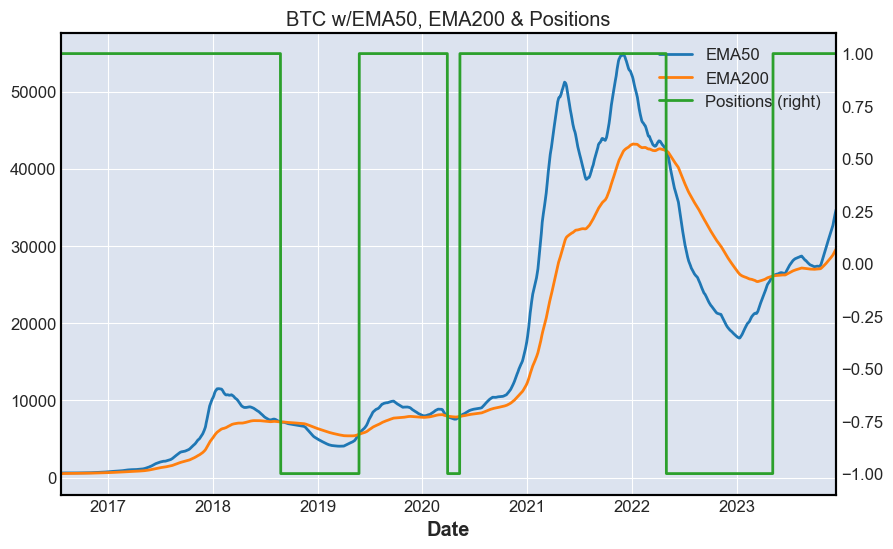

In [80]:
#Position column where 1 is for buy, -1 for sell
df['Positions'] = np.where(df['EMA50'] > df['EMA200'], 1, -1)

#Plot displaying EMA's with Positions
df.loc[:,['EMA50', 'EMA200', 'Positions']].plot(title = 'BTC w/EMA50, EMA200 & Positions', figsize = (10,6), secondary_y = 'Positions')

In [81]:
df['Trades'] = df['Positions'].diff().fillna(0).abs()
print(df['Trades'].value_counts())

0.0    2698
2.0       6
Name: Trades, dtype: int64


/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/229230355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trades'] = df['Positions'].diff().fillna(0).abs()


In [89]:
#Filtered df of when EMA50 and EMA200 crossed over each other
df2 = df[df['Trades'] == 2.0]
df2

,Price,Log Returns,Cumulative Returns,EMA50,EMA200,Positions,Trades
Date,,,,,,,
2018-08-25,6763.189941,0.006412,15.603593,7190.197871,7193.670473,-1,2.0
2019-05-26,8673.215820,0.074252,20.010281,5626.633877,5600.433833,1,2.0
2020-03-29,5922.042969,-0.052650,13.662953,7931.058762,7954.547713,-1,2.0
2020-05-11,8601.795898,-0.017817,19.845505,7915.073657,7912.403861,1,2.0
2022-05-01,38469.093750,0.019801,88.753397,42253.629020,42300.333572,-1,2.0
2023-05-08,27694.273438,-0.027097,63.894431,26130.837970,26114.595620,1,2.0


In [90]:
#Making a column for percentage change based on death or golden cross
df2['Returns'] = df2['Price'].pct_change() * 100
df2

#Still beating boomer gains!!! 

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_2192/3038840351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Returns'] = df2['Price'].pct_change() * 100


,Price,Log Returns,Cumulative Returns,EMA50,EMA200,Positions,Trades,Returns
Date,,,,,,,,
2018-08-25,6763.189941,0.006412,15.603593,7190.197871,7193.670473,-1,2.0,NaN
2019-05-26,8673.215820,0.074252,20.010281,5626.633877,5600.433833,1,2.0,28.241494
2020-03-29,5922.042969,-0.052650,13.662953,7931.058762,7954.547713,-1,2.0,-31.720332
2020-05-11,8601.795898,-0.017817,19.845505,7915.073657,7912.403861,1,2.0,45.250481
2022-05-01,38469.093750,0.019801,88.753397,42253.629020,42300.333572,-1,2.0,347.221652
2023-05-08,27694.273438,-0.027097,63.894431,26130.837970,26114.595620,1,2.0,-28.009031


/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


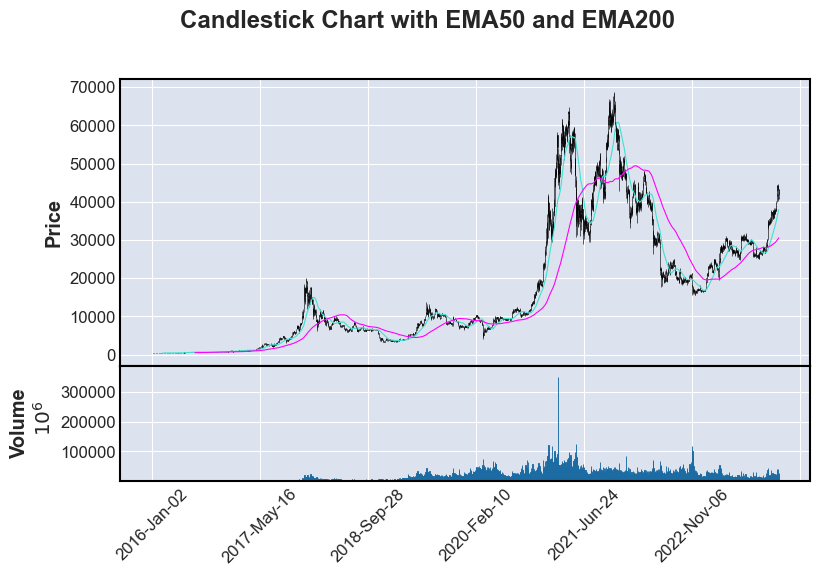

In [79]:
#Candlestick plot
import mplfinance as mpf

# Plotting candlestick chart with EMA lines
mpf.plot(dforiginal, type='candle', mav=(50, 200), volume=True, figratio=(10, 6),
         title='Candlestick Chart with EMA50 and EMA200',
         ylabel='Price', ylabel_lower='Volume')

# Show the plot
plt.show()